<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])

blob_std = np.array([0.3, 0.3, 0.1, 0.1, 0.1])  # Now has 5 values

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred[:5]

array([1, 1, 4, 1, 1], dtype=int32)

In [ ]:
X.shape

(2000, 2)

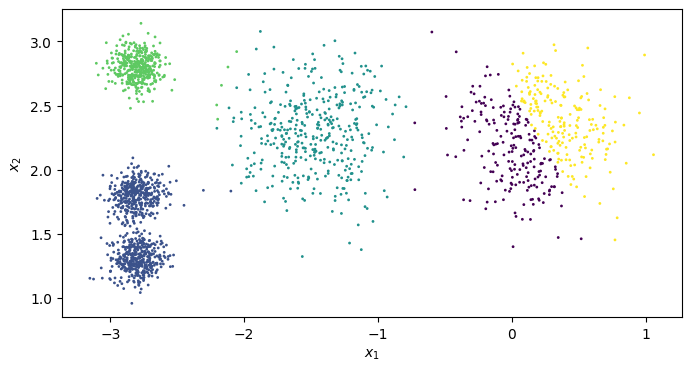

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
  plt.figure(figsize=(8,4))
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")

plot_clusters(X, y_pred)
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-0.01482067,  2.1532017 ],
       [-2.80214068,  1.55162671],
       [-1.47774837,  2.28453892],
       [-2.79290307,  2.79641063],
       [ 0.39846257,  2.38096728]])

In [ ]:
kmeans.labels_

array([1, 1, 4, ..., 3, 4, 1], dtype=int32)

In [ ]:
import numpy as np

X_new=np.array([[0,2], [3,2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 3, 3], dtype=int32)

In [ ]:
kmeans.transform(X_new)

array([[0.15391691, 2.83778629, 1.5048929 , 2.9042344 , 0.55127896],
       [3.01871073, 5.81943941, 4.48677978, 5.84739223, 2.62928375],
       [3.10296036, 1.4618254 , 1.68200315, 0.29040966, 3.45438119],
       [3.00525617, 0.96879317, 1.53742431, 0.36159148, 3.40054652]])

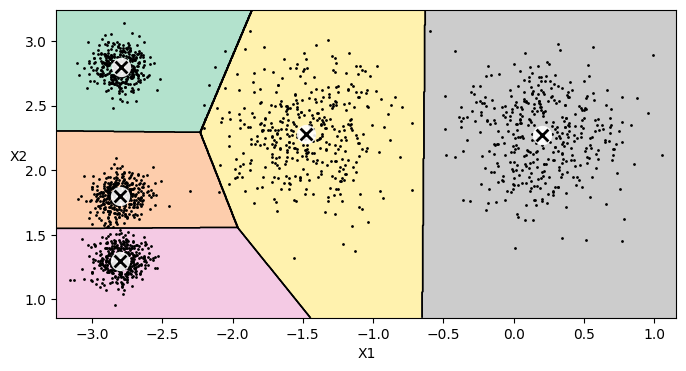

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("X1")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("X2", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

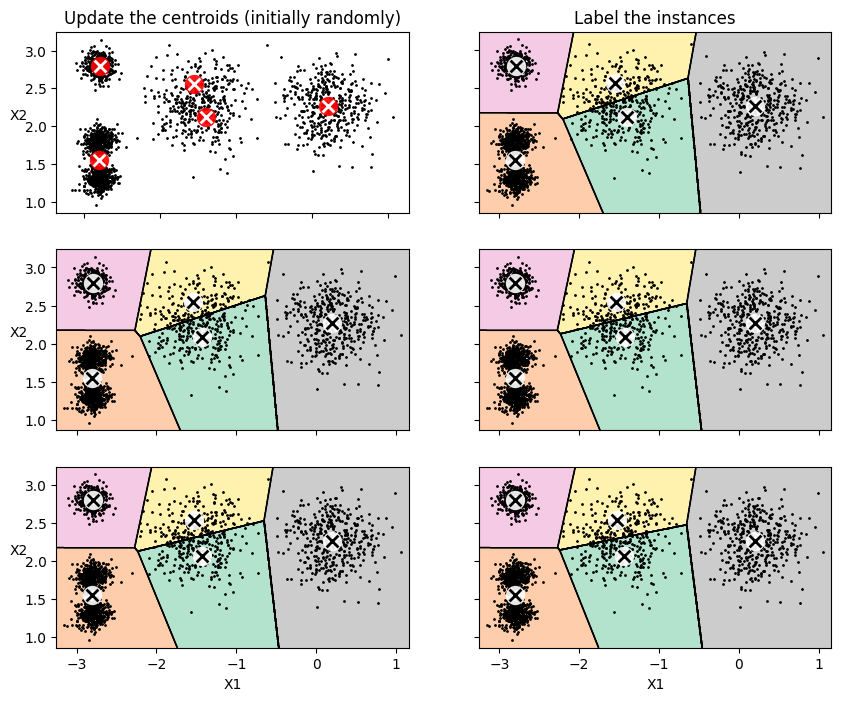

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("X2", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()


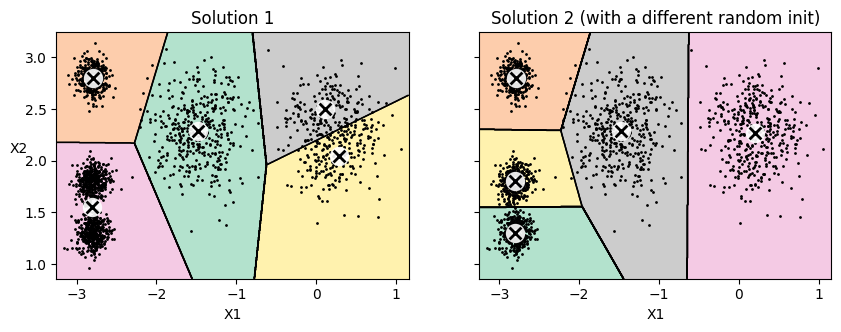

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")


plt.show()

In [ ]:
good_init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1,2], [0, 2]])
kmeans=KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

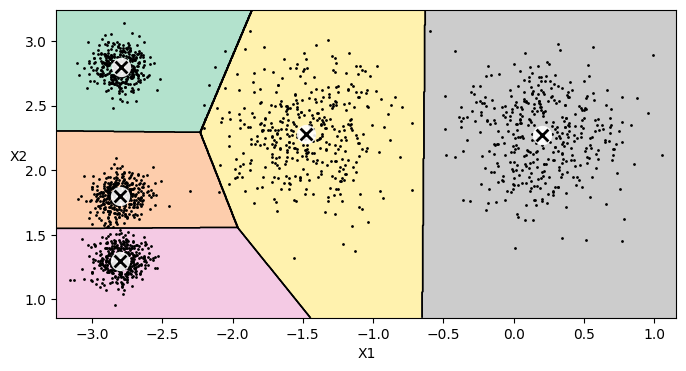

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [ ]:
kmeans.inertia_

160.621474224147

In [ ]:
kmeans.score(X)

-160.62147422414697

#Mini Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

160.67686862668893

#Choosing the optimal number of clusters

In [ ]:
kmeans_per_k=[KMeans(n_clusters=k, random_state=42).fit(X)
              for k in range(1,10)]
inertias=[model.inertia_ for model in kmeans_per_k]

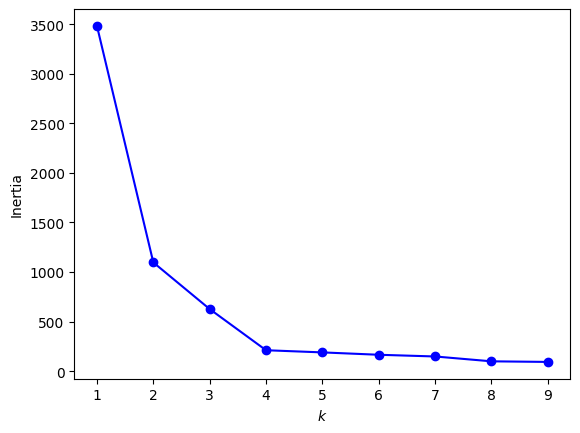

In [ ]:
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores=[silhouette_score(X, model.labels_)
                  for model in kmeans_per_k[1:]]

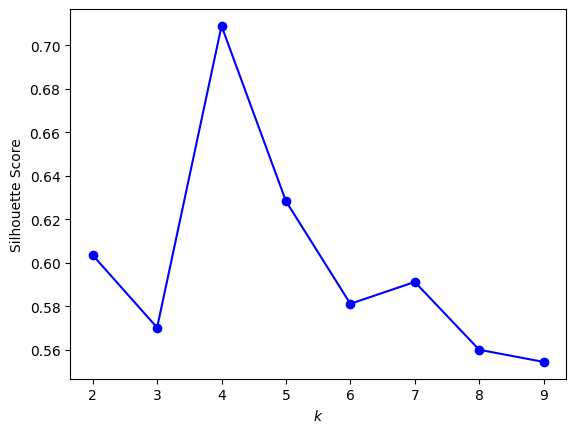

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette Score")
plt.show()